In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('covid.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-08-17,17,8,2020,45,5,Afghanistan,AF,AFG,38041757.0,Asia,2.329020
1,2020-08-16,16,8,2020,120,7,Afghanistan,AF,AFG,38041757.0,Asia,2.210729
2,2020-08-15,15,8,2020,7,0,Afghanistan,AF,AFG,38041757.0,Asia,1.895286
3,2020-08-14,14,8,2020,79,9,Afghanistan,AF,AFG,38041757.0,Asia,2.318505
4,2020-08-13,13,8,2020,76,10,Afghanistan,AF,AFG,38041757.0,Asia,2.297475


In [3]:
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          156
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2781
dtype: int64

In [4]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [5]:
df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [6]:
df.countriesAndTerritories.value_counts()

Norway                                        231
Brazil                                        231
Iran                                          231
Sweden                                        231
Iceland                                       231
                                             ... 
Western_Sahara                                114
Tajikistan                                    109
Comoros                                       108
Lesotho                                        95
Cases_on_an_international_conveyance_Japan     64
Name: countriesAndTerritories, Length: 210, dtype: int64

In [7]:
df.continentExp.value_counts()

Europe     10670
Africa      8436
Asia        8399
America     7903
Oceania     1348
Other         64
Name: continentExp, dtype: int64

In [8]:
df.drop(columns = ['geoId', 'countryterritoryCode', 
        'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] , axis=1, inplace=True)

In [9]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp
0,2020-08-17,17,8,2020,45,5,Afghanistan,38041757.0,Asia
1,2020-08-16,16,8,2020,120,7,Afghanistan,38041757.0,Asia
2,2020-08-15,15,8,2020,7,0,Afghanistan,38041757.0,Asia
3,2020-08-14,14,8,2020,79,9,Afghanistan,38041757.0,Asia
4,2020-08-13,13,8,2020,76,10,Afghanistan,38041757.0,Asia


In [10]:
df.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
popData2019                       float64
continentExp                       object
dtype: object

In [11]:
df.isnull().sum() , df.isna().sum()

(dateRep                     0
 day                         0
 month                       0
 year                        0
 cases                       0
 deaths                      0
 countriesAndTerritories     0
 popData2019                64
 continentExp                0
 dtype: int64,
 dateRep                     0
 day                         0
 month                       0
 year                        0
 cases                       0
 deaths                      0
 countriesAndTerritories     0
 popData2019                64
 continentExp                0
 dtype: int64)

In [12]:
df.rename(columns={"countriesAndTerritories" : "Country", "continentExp" : "Continent", 
                   "popData2019" : "Population", "cases":"Cases", "deaths":"Deaths", 
                   "day":"Day", "month":"Month", "year":"Year"},inplace=True)
df.head()

,dateRep,Day,Month,Year,Cases,Deaths,Country,Population,Continent
0,2020-08-17,17,8,2020,45,5,Afghanistan,38041757.0,Asia
1,2020-08-16,16,8,2020,120,7,Afghanistan,38041757.0,Asia
2,2020-08-15,15,8,2020,7,0,Afghanistan,38041757.0,Asia
3,2020-08-14,14,8,2020,79,9,Afghanistan,38041757.0,Asia
4,2020-08-13,13,8,2020,76,10,Afghanistan,38041757.0,Asia


In [13]:
df.shape

(36820, 9)

In [14]:
df.isna().sum()

dateRep        0
Day            0
Month          0
Year           0
Cases          0
Deaths         0
Country        0
Population    64
Continent      0
dtype: int64

In [15]:
df[(df.Cases ==0) & (df.Deaths == 0)].shape

(13052, 9)

In [16]:
df.dropna(inplace=True)
df.isnull().sum()

dateRep       0
Day           0
Month         0
Year          0
Cases         0
Deaths        0
Country       0
Population    0
Continent     0
dtype: int64

In [17]:
df.head()

,dateRep,Day,Month,Year,Cases,Deaths,Country,Population,Continent
0,2020-08-17,17,8,2020,45,5,Afghanistan,38041757.0,Asia
1,2020-08-16,16,8,2020,120,7,Afghanistan,38041757.0,Asia
2,2020-08-15,15,8,2020,7,0,Afghanistan,38041757.0,Asia
3,2020-08-14,14,8,2020,79,9,Afghanistan,38041757.0,Asia
4,2020-08-13,13,8,2020,76,10,Afghanistan,38041757.0,Asia


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Cases'>

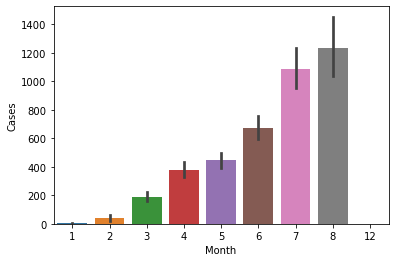

In [18]:
sns.barplot(df.Month, df.Cases)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Deaths'>

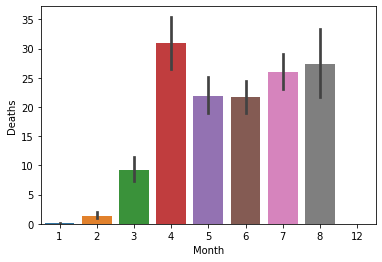

In [19]:
sns.barplot(df.Month, df.Deaths)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Cases'>

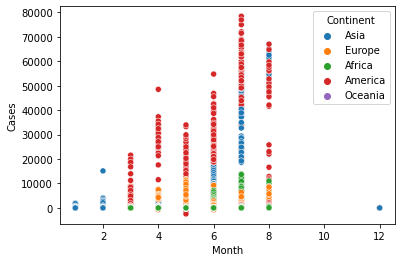

In [20]:
sns.scatterplot(df.Month, df.Cases, hue=df.Continent)

In [21]:
#df.to_excel('covid_final.xlsx')

In [22]:
df.drop(index = df[df.Deaths < 0].index, inplace = True)

In [23]:
df.drop(index = df[df.Cases < 0].index, inplace = True)

In [24]:
df.shape

(36735, 9)

In [25]:
df.to_excel('covid_dataset.xlsx')